In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'D:\Abhay-doc\learn MA\Marketing-Mix\Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [9]:
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_clean.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
#Data Description 

df_clean.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
#Correlation b/w variables
corr = df_clean.corr()
df_clean.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


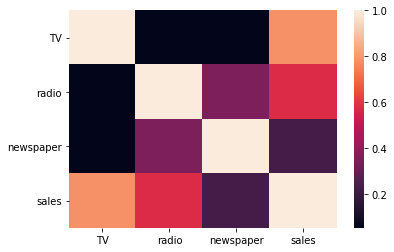

In [18]:
sns.heatmap(corr)

In [19]:
#Labels and features
labels = df_clean['sales']
features = df_clean.drop(['sales'], axis=1)

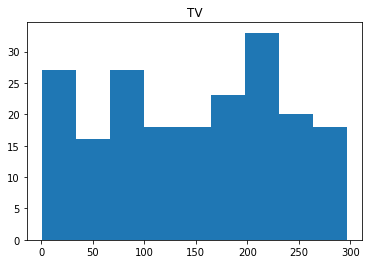

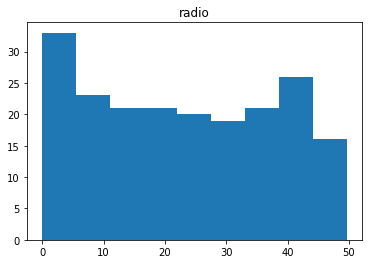

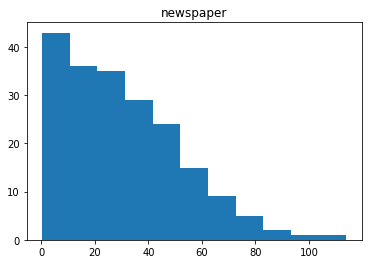

In [20]:
#Data Distribultion 
for x in features:
    plt.hist(features[x], bins='auto')  # arguments are passed to np.histogram
    plt.title(x)
    plt.show()

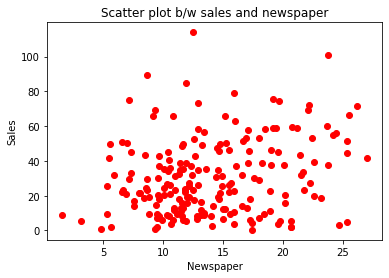

In [21]:
plt.plot(df_clean['sales'], df_clean['newspaper'], 'ro')  # arguments are passed to np.histogram
plt.title("Scatter plot b/w sales and newspaper")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

In [24]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="sales~TV+radio+newspaper", data=df_clean).fit()
model2 = sm.ols(formula="sales~TV+radio", data=df_clean).fit()
model3 = sm.ols(formula="sales~TV", data=df_clean).fit()
#sales~TV+radio+newspaper
print(model1.summary())
print(model2.summary())
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.58e-96
Time:                        17:48:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [25]:
#Model 2 Parameters, error, and r square
print('Parameters: ', model2.params)
print('R2: ', model2.rsquared)
print('Standard errors: ', model2.bse)

Parameters:  Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64
R2:  0.8971942610828957
Standard errors:  Intercept    0.29449
TV           0.00139
radio        0.00804
dtype: float64
